In [1]:
 # Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Projects/Time_series/airline-passenger-traffic.csv", header = None)
data.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [4]:
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


**Time series Analysis**

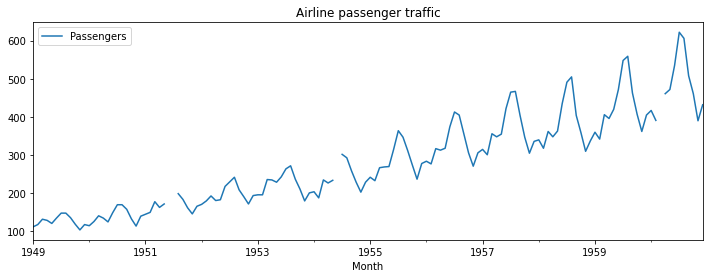

In [5]:
#Plot time series data:
data.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Airline passenger traffic')
plt.show(block=False)

We can see that there are some missing values in the data. we need to replace the missing data, using some imputation techinues like median or mean(doesnt consider temporal value)

1. Some other techniques are : Last observation carry forward (Naive, but captures the trend atleast)
2. Linear interpolation: Everytime we have missing value, Draw a straight line between the missing left and right points( trend gets captured,but seasonality might not)
3. Seasonality linear interpolation: 1956 March can be average of 1954 March and 1957 March. This can be used as imputation which takes care of trend and Seasonality into consideration.

**Missing value treatement**

In [6]:
#Mean Imputation
data  = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))

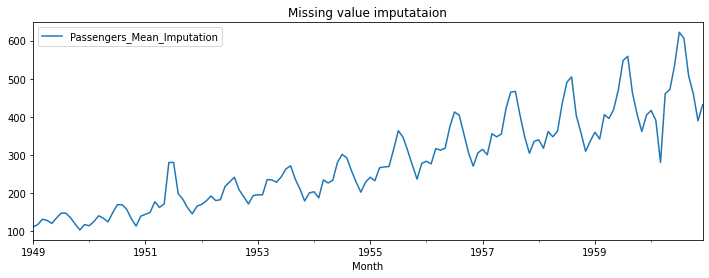

In [7]:
#Plot time series data for the mean imputation:
data[['Passengers_Mean_Imputation']].plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Missing value imputataion')
plt.show(block=False)

Observation:

If we see in the year of 1952, the imputation is with mean and way above the values of passengers present at that point of time (over estimation).

In the year of 1960's we can see the imputaion of mean caused severe under estimation of the passengers

**Linear Interpolation**

In [8]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method ='linear'))

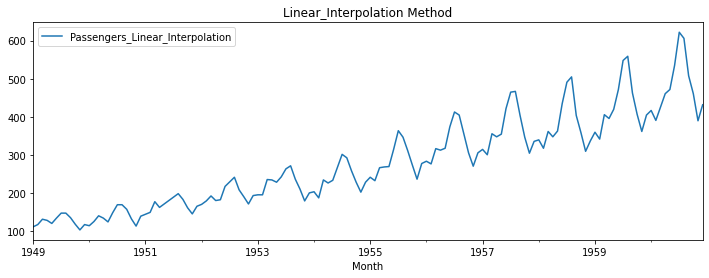

In [9]:
#Plot time series data for linear interpolation:
data[['Passengers_Linear_Interpolation']].plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Linear_Interpolation Method')
plt.show(block=False)

**Observations**:

As this technique takes the avg of left and right of the missing obs, and we can see that the trend gettting captured

So we can use the linear interpolation technique to replace the missing values

In [10]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

# Outlier Detection

**Box plot and inter quartile range**

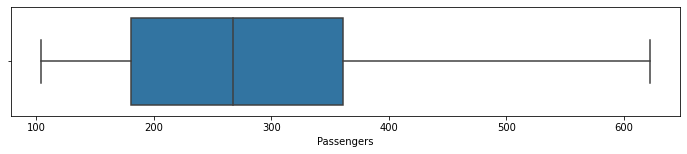

In [11]:
import seaborn as sns
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1.5)

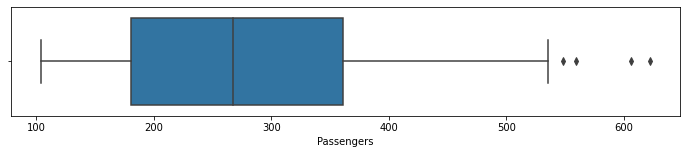

In [12]:
import seaborn as sns
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1)

As we can see that the data points which were identified as outliers in the whis = 1 scenario are not outlier but the healthy seasonality indexed points as per the time series plot of the data. So we can say that there are no outliers as per this box plot methods

**Histogram plot**

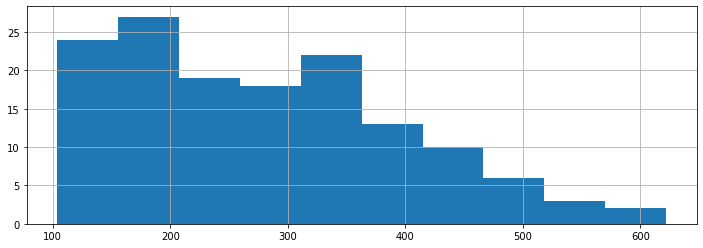

In [13]:
fig = data.Passengers.hist(figsize = (12,4))

Here also we can see that there is no break in the distribution of the data , so as per this method also we can conclude that there are no outliers in this column

# Time series decomposition

**Additive seasonal decompostion**

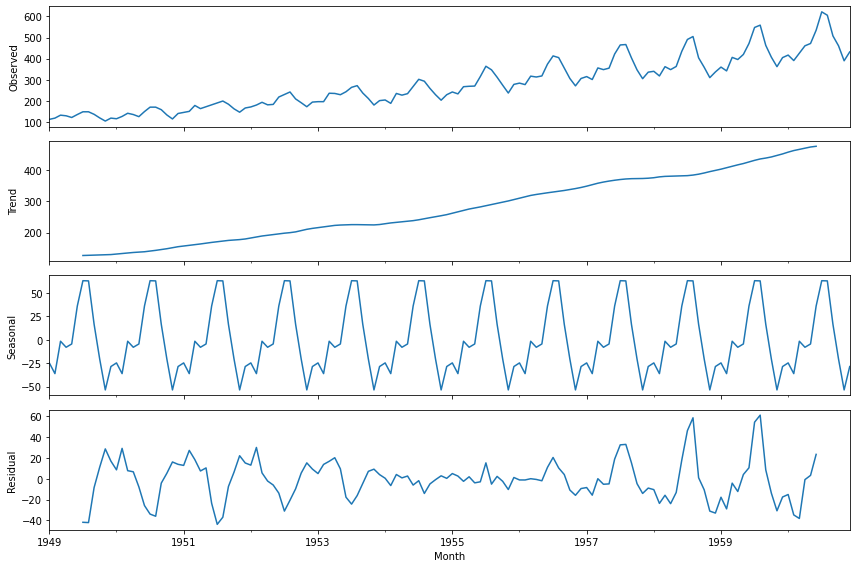

In [14]:
from pylab import rcParams
# will suse extensively 
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
#tsa means timeseriesanalysis
decompostion = sm.tsa.seasonal_decompose(data.Passengers, model = 'additive')
fig = decompostion.plot()
plt.show()

**Observations**: As we can see when we decomposed the timeseries data into trend, seasonality and residual.

1. Trend: Is it increasing or decreasing?
2. Seasional: We can see if the data is having any seasonal effects of repeting the data pattern
3. Residual: After removing the trend and seasonality we are left with this, even then we can see that there is some sort of seasonlity being observed in the residual.

**Multiplicative Seasional Decomposition**

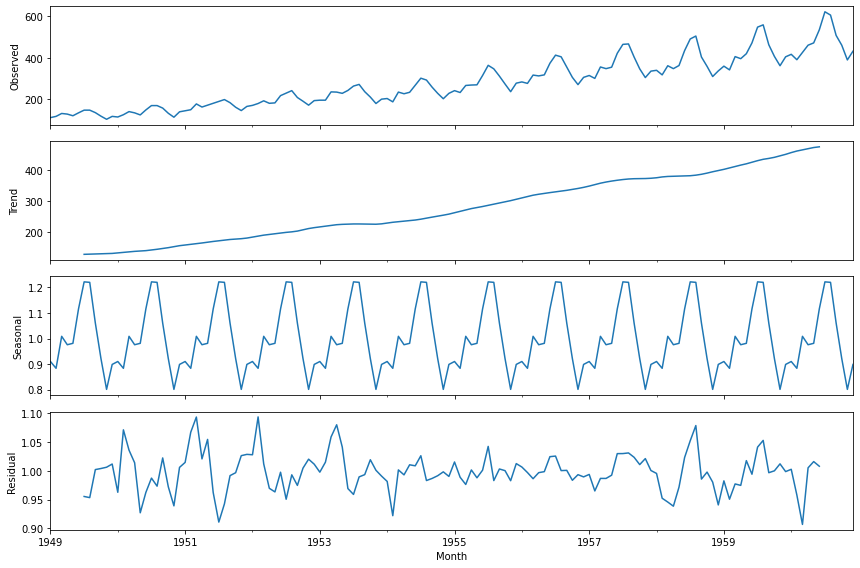

In [15]:
decomposition2 = sm.tsa.seasonal_decompose(data.Passengers, model ='multiplicative')
fig = decomposition2.plot()
plt.show()

# Build and evaluate Time Series Forecast

In [16]:
# Splitting the dataset into train and test datasets
# first 120 rows
train_len = 120
train = data[0:train_len]
test = data[train_len:]

# Naive Method

In [17]:
y_hat_naive = test.copy()
#Taking the last observation of the train dataset and getting it as the forecast for the rest of the test dataset
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [18]:
y_hat_naive['naive_forecast']

Month
1959-01-01    337.0
1959-02-01    337.0
1959-03-01    337.0
1959-04-01    337.0
1959-05-01    337.0
1959-06-01    337.0
1959-07-01    337.0
1959-08-01    337.0
1959-09-01    337.0
1959-10-01    337.0
1959-11-01    337.0
1959-12-01    337.0
1960-01-01    337.0
1960-02-01    337.0
1960-03-01    337.0
1960-04-01    337.0
1960-05-01    337.0
1960-06-01    337.0
1960-07-01    337.0
1960-08-01    337.0
1960-09-01    337.0
1960-10-01    337.0
1960-11-01    337.0
1960-12-01    337.0
Name: naive_forecast, dtype: float64

**Plot train,test and forecast**

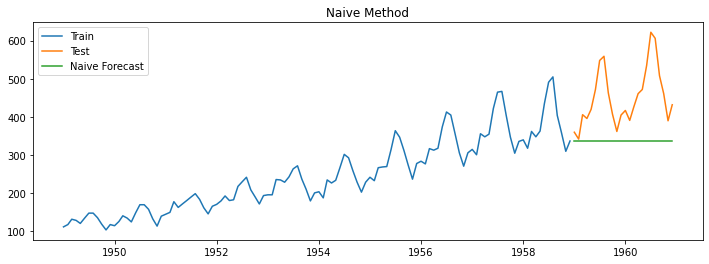

In [19]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label ='Naive Forecast')
plt.legend(loc = 'best')
plt.title('Naive Method')
plt.show()

**Caluculating the RMSE and MAPE to evaluate Forecast**

In [20]:
# to caluculate RMSE: Root Mean Square Error:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)
results = pd.DataFrame({'Method':['Naive Method'],'MAPE': [mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


# Simple Moving average method

In [21]:
y_hat_sma = data.copy()
#moving average window
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

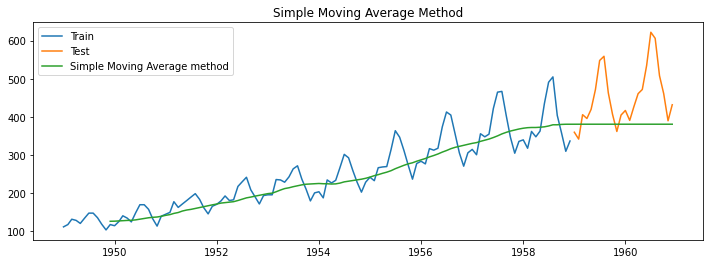

In [22]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

**Observations**:

We can see that the somewhat recent trend is getting inherently getting captured.
It is better than the simple average method

In [23]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Moving Averge Method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54


Reducing the moving average window:

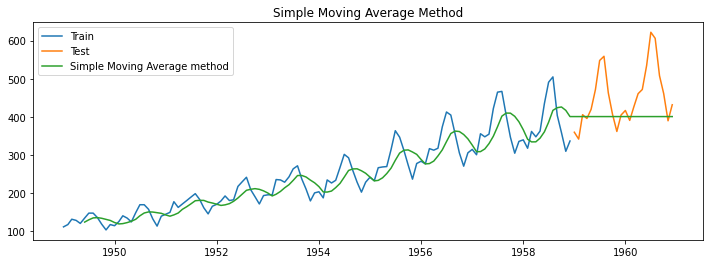

In [24]:
#moving average window
ma_window = 6
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

**Observation:** We can see that the seasonality is getting captured but with a lag of some 4-5 months.

Lets see what would happen if we reduce the moving average window to 3 months

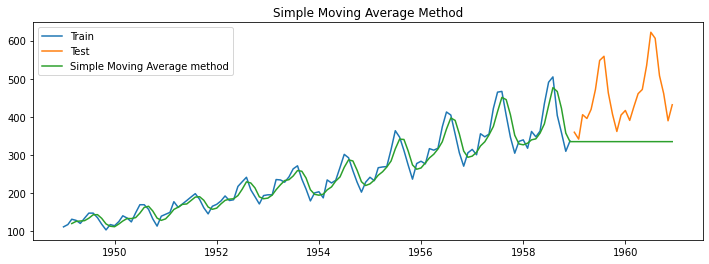

In [25]:
#moving average window
ma_window = 3
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

This is not good absolutely because we are failing to predict seasnality as the window got smaller, look at 1960 jan value

# Simple Exponential Smooting

In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#Creating a model object for simple exp smoothing
model = SimpleExpSmoothing(train['Passengers'])
#Smoothing level is the alpha parmeter, i.e the weight assigned to the latest data point
model_fit = model.fit(smoothing_level = 0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**Plotting train, test, forecast**

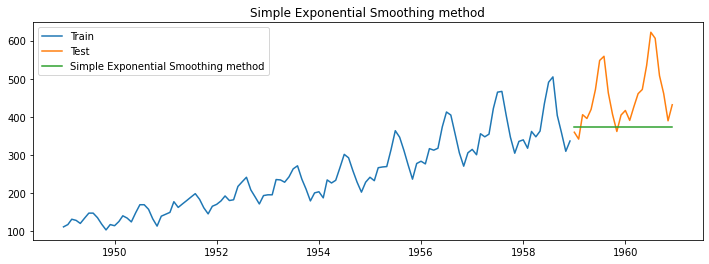

In [27]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ses['ses_forecast'], label ='Simple Exponential Smoothing method')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing method')
plt.show()

In [28]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Exponential Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49


# Auto Regressive Methods

**Stationary vs. Non-stationary Time series**

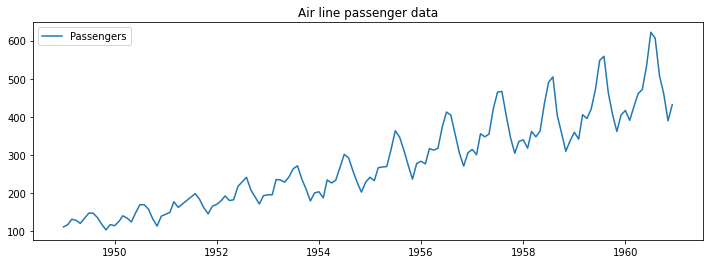

In [29]:
# Plotting Timeseries data
plt.figure(figsize = (12,4))
plt.plot(data['Passengers'], label = 'Passengers')
plt.legend(loc = 'best')
plt.title('Air line passenger data')
plt.show()

**Observations:**

Is it stationary? Visually not stationary, To check if this is stationary or not we can perform ADF Test

**Augemented Dickey- Fuller (ADF) test**

In [30]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' %adf_test[4]['5%'])
print('p-value %f' % adf_test[1])

ADF statistic: 0.894609
Critical Value @ 0.05: -2.88
p-value 0.993020


In [31]:
adf_test

(0.8946087940823911,
 0.9930195647605925,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 993.7736365973918)

**Note: Augmented Dickey-Fuller (ADF) Test**

Null Hypothesis(H0) : The series is not stationary. p-value >0.05

Alternate Hypothesis (H1) : The series is stationary. p-value <=0.05

The p-value is not less than 0.05, so we can say that the series is not stataionary

**KPSS Test**

In [32]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS statistic: %f' %kpss_test[0])
print('Crtical Value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value %f' %kpss_test[1])

KPSS statistic: 1.052050
Crtical Value @ 0.05: 0.46
p-value 0.010000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [33]:
kpss_test

(1.0520501504573108,
 0.01,
 14,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

**Note: Kwaitowski- Phillips- Schmidt-Shin (KPSS) Test**

Null Hypothesis(H0) : The series is stationary. p-value >0.05

Alternate Hypothesis (H1) : The series is not stationary. p-value <=0.05

# Box Cox Transformation

To make the variance constant in Time series

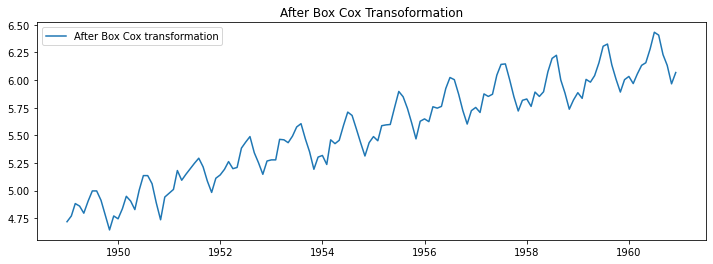

In [34]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda = 0), index = data.index)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox, label = 'After Box Cox transformation')
plt.legend(loc = 'best')
plt.title('After Box Cox Transoformation')
plt.show()

**Differencing**



*   Removes the Trend and Seasonality in a time series

*   Is performed by subtracting the previous observation from the current observation



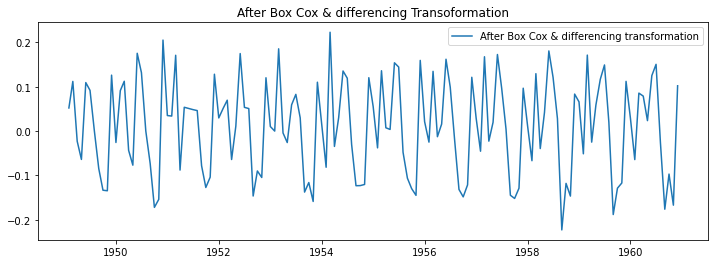

In [35]:
data_boxcox_diff = pd.Series(data_boxcox-data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace = True)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox_diff, label = 'After Box Cox & differencing transformation')
plt.legend(loc = 'best')
plt.title('After Box Cox & differencing Transoformation')
plt.show()

Looks like it is a more visually stationary Lets perform the formal tests to understand whether the transoformations made it a stationary

In [36]:
adf_test = adfuller(data_boxcox_diff)

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' %adf_test[4]['5%'])
print('p-value %f' % adf_test[1])

ADF statistic: -3.290114
Critical Value @ 0.05: -2.88
p-value 0.015326


ADF-statistic is < Critical Value at 0.05 and p-value is < 0.05

In [37]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS statistic: %f' %kpss_test[0])
print('Crtical Value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value %f' %kpss_test[1])

KPSS statistic: 0.101871
Crtical Value @ 0.05: 0.46
p-value 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


we can build an auto regressive model on this stationary data now

**Auto Correlation Function Plot**

To understand the Correlation of the series with its lagged series

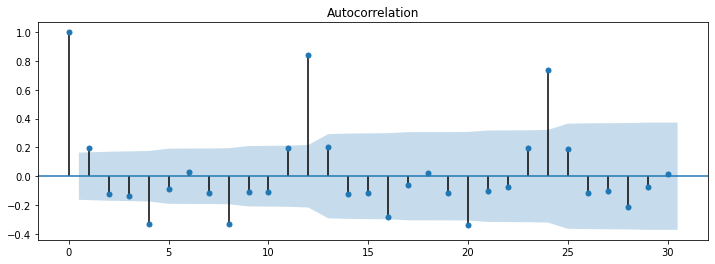

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (12,4))
plot_acf(data_boxcox_diff, ax= plt.gca(), lags= 30)
plt.show()

**Observation:**

How our 1st lag, 4th lag and 12 th lags are highly correltaed

**Partial Autocorrelation plot (PACF)**

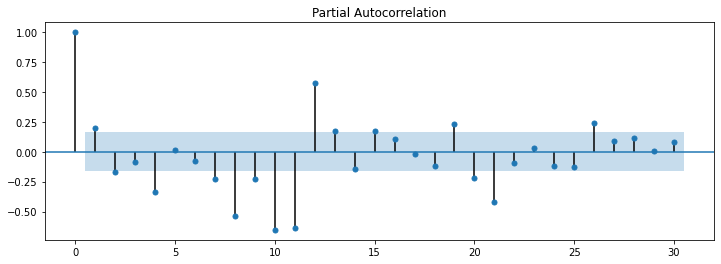

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (12,4))
plot_pacf(data_boxcox_diff, ax= plt.gca(), lags= 30)
plt.show()

**Obs:** The primary difference in PACF and ACF: when we see the lag4, we see the direct relationship bwtween lag 0 and lag 4, not including the lag1,2,3,and 4

**Split into training and test data sets**

In [40]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
#Since we dropped the first row , sow e use train_len-1
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# Auto Regressive Model (AR)

In [41]:
from statsmodels.tsa.arima_model import ARIMA

#We will nullify the IMA parameters in ARIMA model function
model = ARIMA(train_data_boxcox_diff, order = (1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009477
ar.L1.y    0.183116
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**Recover Original Time Series forecast**

In [42]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

**Plot train, test and forecast**

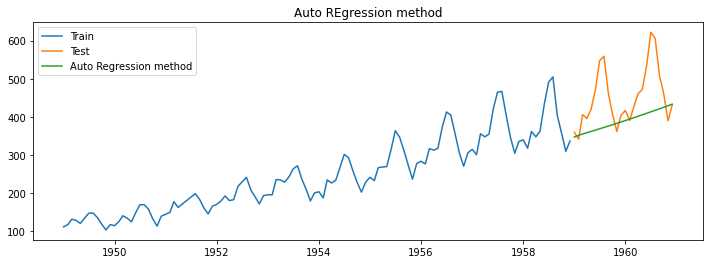

In [43]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label ='Auto Regression method')
plt.legend(loc = 'best')
plt.title('Auto REgression method')
plt.show()

**Caluculating RMSE and MAPE**

In [44]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Auto Regression method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Auto Regression method,93.39,13.77


# Moving Average (MA) Method

In [45]:
#We will nullify the ARI parameters in ARIMA model function
model = ARIMA(train_data_boxcox_diff, order = (0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**Recovering the Original time series forecast**

In [46]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

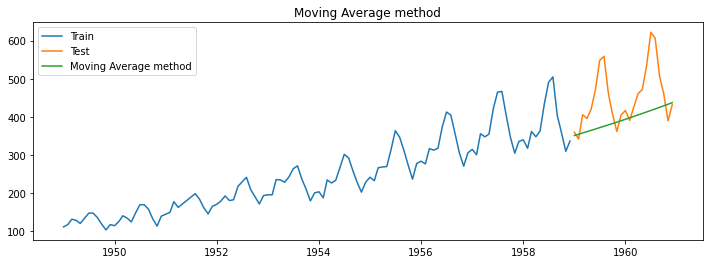

In [47]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label ='Moving Average method')
plt.legend(loc = 'best')
plt.title('Moving Average method')
plt.show()

In [48]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Moving Average method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39


# Auto Regressive Moving Average (ARMA) method

uses the past observations and past error to predict the future data

In [49]:
model = ARIMA(train_data_boxcox_diff, order = (1,0,1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: float64


**Recovering the original timeseries forecast**

In [50]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] =y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

**Plotting train, test, forecast series**

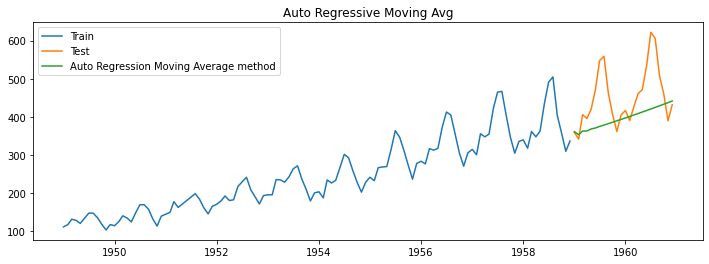

In [51]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label ='Auto Regression Moving Average method')
plt.legend(loc = 'best')
plt.title('Auto Regressive Moving Avg')
plt.show()

**RMSE and MAPE caluculations**

In [52]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['ARMA method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89


# Auto Regressive Integrated Moving Average (ARIMA) Method

In [53]:
#no need to send the differenced data as ARIMA has built in capability to do differencing
model = ARIMA(train_data_boxcox, order = (1,1,1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64


**Recovering Original Time series forecast**

In [54]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] =y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

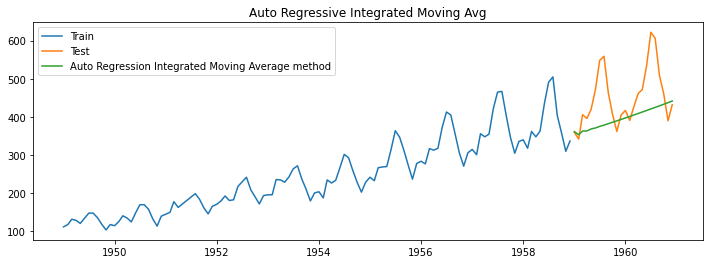

In [55]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label ='Auto Regression Integrated Moving Average method')
plt.legend(loc = 'best')
plt.title('Auto Regressive Integrated Moving Avg')
plt.show()

In [56]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['ARIMA method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89
0,ARIMA method,88.88,12.89


**Obs:**

With the current configuration ARMA with 1 level of differencing is same as ARIMA(1,1,1) thats the reason we see the RMSE and MAPE to be same here

# Seasonal Auto Regressive Integrated Moving Average (SARIMA) Method

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#We will e configuring SARIMAX to have only sarima config
model = SARIMAX(train_data_boxcox, order = (1,1,1), seasonal_order = (1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1       0.393524
ma.L1      -0.683643
ar.S.L12   -0.039830
ma.S.L12   -0.518433
sigma2      0.001407
dtype: float64


**Recover Original Time series forecast**

In [58]:
y_hat_sarima = data_boxcox_diff.copy()
#sarima gives you the forecast of the trasformed series internally , no need of transofrmation externally
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

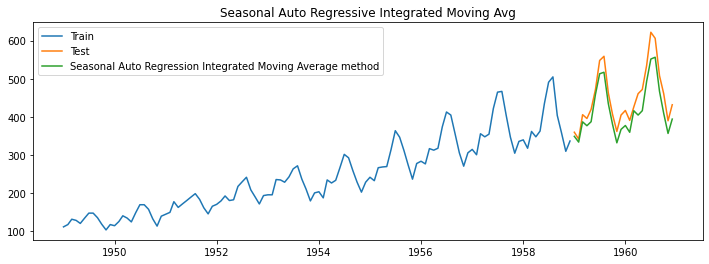

In [59]:
#Plot train, test and forecast
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label ='Seasonal Auto Regression Integrated Moving Average method')
plt.legend(loc = 'best')
plt.title('Seasonal Auto Regressive Integrated Moving Avg')
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['SARIMA method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89
0,ARIMA method,88.88,12.89
0,SARIMA method,37.44,7.35


# Seasonal Auto Regressive Integrated Moving Average with external variables (SARIMAX) Method

In [62]:
promo = pd.read_csv('/content/drive/MyDrive/Projects/Time_series/promotion.csv', header = None)
promo.columns = ['Month', 'Event']
promo['Month'] = pd.to_datetime(promo['Month'], format = '%Y-%m')
promo = promo.set_index('Month')
promo

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0
...,...
1960-08-01,1
1960-09-01,1
1960-10-01,1


In [63]:
promo_train = promo[:train_len]
promo_test = promo[train_len:]

In [64]:
model = SARIMAX(train_data_boxcox, order = (1,1,1), seasonal_order= (1,1,1,12), exog = promo_train)
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Event       0.034351
ar.L1       0.483488
ma.L1      -0.744977
ar.S.L12   -0.065162
ma.S.L12   -0.556708
sigma2      0.001335
dtype: float64


**Recover Original Time series forecast**

In [65]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(test.index.min(), test.index.max(), exog = promo_test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

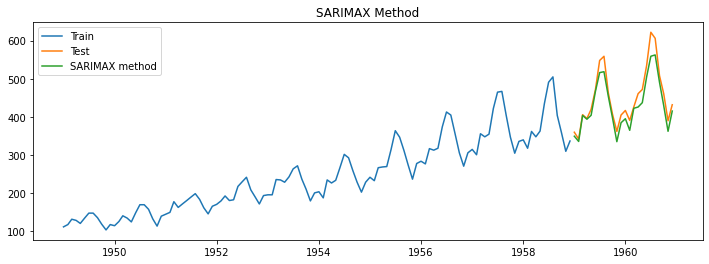

In [66]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label ='SARIMAX method')
plt.legend(loc = 'best')
plt.title('SARIMAX Method')
plt.show()

In [67]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['SARIMAX method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89
0,ARIMA method,88.88,12.89
0,SARIMA method,37.44,7.35
0,SARIMAX method,26.57,4.64


**Observation:**

We can see that the SARIMAX Performs better than rest of the  methods, also as we are capturing the Trend, seasonality and the external factors causing the same.